https://github.com/arunm8489/Amazon_Fine_Food_Reviews-sentiment_analysis/blob/master/Notebooks/4.%20Logistic_regression.ipynb

https://towardsdatascience.com/sentiment-analysis-on-amazon-food-reviews-from-eda-to-deployment-f985c417b0c

https://www.kaggle.com/code/poonaml/text-classification-using-spacy

https://www.kaggle.com/code/elshatakmaev/review-classification-using-pytorch

#### Dependencies

###  1. Data Processing

#### Show DataFrame

In [6]:
import numpy as np
import pandas as pd
import os

In [8]:
#!pip install numpy==1.21.2

In [7]:
#!pip install pandas

In [90]:
df = pd.read_csv('../data/amazon_fine_food_reviews.csv')

In [62]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [63]:
df.shape

(568454, 10)

#### Data Cleaning

##### Remove Nan

In [91]:
df.Summary.isnull().sum()

27

In [92]:
df.dropna(subset=['Summary'], inplace=True)

In [93]:
df.Summary.isnull().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568427 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568427 non-null  int64 
 1   ProductId               568427 non-null  object
 2   UserId                  568427 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568427 non-null  int64 
 5   HelpfulnessDenominator  568427 non-null  int64 
 6   Score                   568427 non-null  int64 
 7   Time                    568427 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568427 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [95]:
df.shape

(568427, 10)

##### Deduplication

In [96]:
df.drop_duplicates(subset=['UserId','ProfileName','Time','Text'], keep='first',inplace=True)

In [97]:
df.shape

(393930, 10)

##### Remove colums without useful information

In [98]:
df.drop(['Id','UserId','ProfileName'], axis=1, inplace=True)

In [99]:
df.shape

(393930, 7)

In [100]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##### Transform time format and add new column

In [101]:
import datetime

In [102]:
datetime.datetime.fromtimestamp(df.loc[0,'Time'])

datetime.datetime(2011, 4, 27, 2, 0)

In [103]:
df['DateTime'] = df['Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [104]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00


In [106]:
df.shape

(393930, 8)

##### Avoid HelpfulnessNumerator bigger that HelpfulnessDenominator

In [107]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
44736,B001EQ55RW,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,2008-06-08 02:00:00
64421,B000MIDROQ,3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,2008-10-25 02:00:00


In [108]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [112]:
df.shape

(393928, 8)

In [115]:
#Checking to see how much % of data still remains
print(f'Remaining data is {((shape[0]*1.0)/(df.shape[0]*1.0))*100}')

Remaining data is 100.0


https://www.kaggle.com/code/prasheel1047/review-positive-or-negative?scriptVersionId=78532145&cellId=16

https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis?scriptVersionId=115541011&cellId=5

##### Remove Special characters

##### Tokenization

##### Remove Stop-words

##### Text normalization
- Convert Lower or Upper case
- Remove punctuation
  

##### Steamming or Lemmatization

### 2. Exploratory Data Analysis

In [120]:
#!pip install matplotlib

In [121]:
import matplotlib.pyplot as plt

#### Descriptive analysis of the data (basic statistics, distributions, etc.).

In [124]:
df.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00


In [128]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,DateTime
count,393928.000000,393928.000000,393928.000000,3.939280e+05,393928
mean,1.734401,2.204758,4.179408,1.296449e+09,2011-01-31 06:26:31.618773248
min,0.000000,0.000000,1.000000,9.393408e+08,1999-10-08 02:00:00
25%,0.000000,0.000000,4.000000,1.271376e+09,2010-04-16 02:00:00
50%,0.000000,1.000000,5.000000,1.311638e+09,2011-07-26 02:00:00
75%,2.000000,2.000000,5.000000,1.332979e+09,2012-03-29 02:00:00
max,866.000000,923.000000,5.000000,1.351210e+09,2012-10-26 02:00:00
std,6.872306,7.534738,1.311925,4.840316e+07,NaN


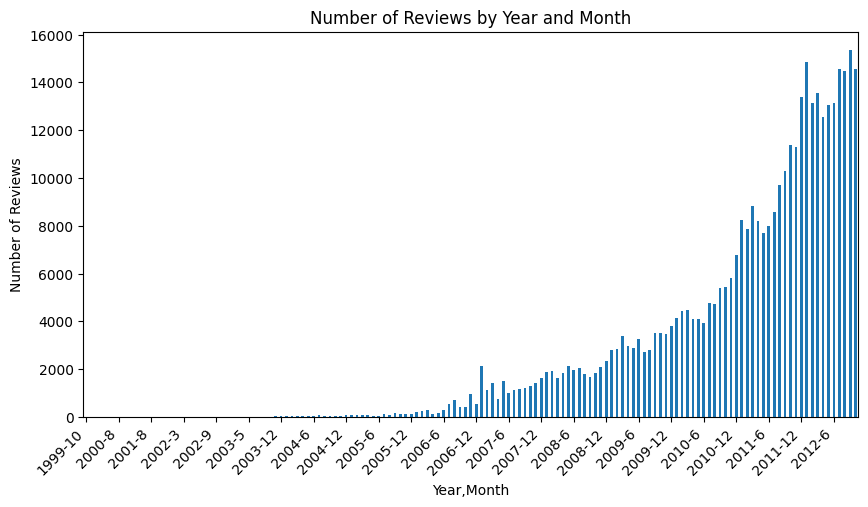

In [139]:
# Assuming 'DateTime' is the column containing timestamps
# Convert the column to datetime format if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])
 
# Extract the year and month components
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by year and month, and count occurrences
monthly_counts = df.groupby(['Year', 'Month']).size()

# Create the time series plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', title='Number of Reviews by Year and Month')

xticks = monthly_counts.index.map(lambda x: f"{x[0]}-{x[1]}")
xticks = xticks[::6]  # Selecciona cada 6 meses
plt.gca().set_xticks(range(0, len(xticks) * 6, 6))
plt.gca().set_xticklabels(xticks, rotation=45, ha='right')

plt.ylabel('Number of Reviews')

# Save the plot
plt.savefig('../reports/images/reviews_for_Year_Month.png')
 
# Show the plot
plt.show()

In [152]:
df.head(1)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Day,Year,Month
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011-04-27,2011,4


In [268]:
dff = df[['Text','Score']]
dff['date'] = pd.to_datetime(df['Time'],unit='s')

C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_7272\1429197469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(df['Time'],unit='s')


In [269]:
dff

,Text,Score,date
0,I have bought several of the Vitality canned d...,5,2011-04-27
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-07
2,This is a confection that has been around a fe...,4,2008-08-18
3,If you are looking for the secret ingredient i...,2,2011-06-13
4,Great taffy at a great price. There was a wid...,5,2012-10-21
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,2011-03-09
568450,I'm disappointed with the flavor. The chocolat...,2,2012-03-09
568451,"These stars are small, so you can give 10-15 o...",5,2012-02-21
568452,These are the BEST treats for training and rew...,5,2012-03-13


More year, more internet, more reviews

##### Reviews Days

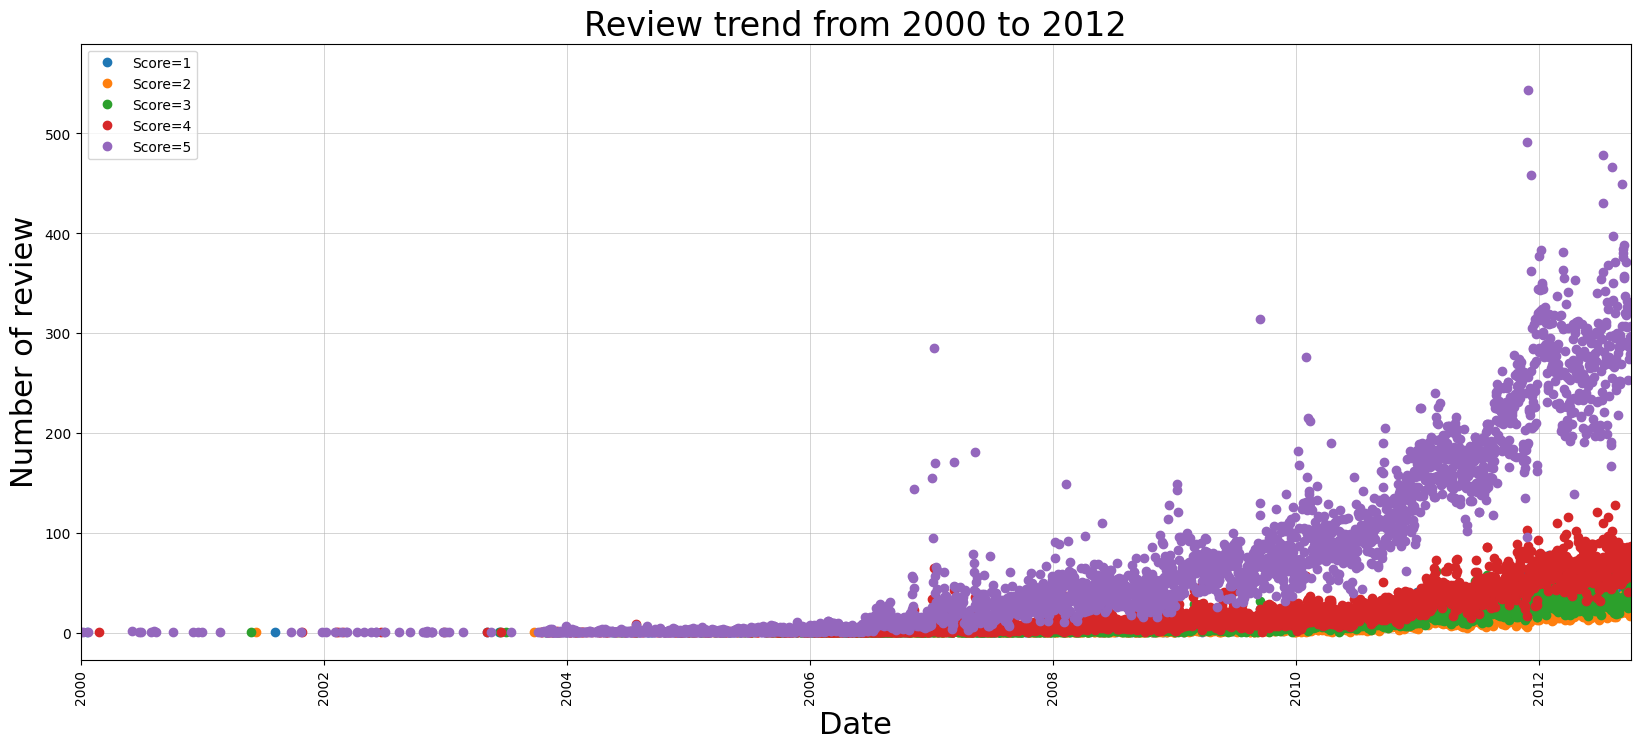

In [270]:
# Assuming 'dff' is your DataFrame

# Convert 'date' to datetime
#dff.date = df.date.dt.strftime('%Y-%m-%d')
#dff['date'] = pd.to_datetime(dff['date'] )

# Filter and count by score
scores = [1, 2, 3, 4, 5]
plt.figure(figsize=(20, 8))
for score in scores:
    dff_score = dff[dff['Score'] == score].groupby('date').size().reset_index(name='Count')
    plt.plot_date(x=dff_score['date'], y=dff_score['Count'], label=f'Score={score}')

# Customize the plot
plt.grid(linewidth=0.5, alpha=0.75)
plt.xticks(rotation=90)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2012-10-01'))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of review', fontsize=22)
plt.title('Review trend from 2000 to 2012', fontsize=24)

# Save the plot
plt.savefig('../reports/images/review_trend_day.png')

# Show the legend
plt.legend()

# Show the plot
plt.show()

##### Reviews Month

C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_7272\2067159032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.date = dff.date.dt.strftime('%Y-%m')
C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_7272\2067159032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(dff['date'] )


,Text,Score,date
0,I have bought several of the Vitality canned d...,5,2011-04-01
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-01
2,This is a confection that has been around a fe...,4,2008-08-01
3,If you are looking for the secret ingredient i...,2,2011-06-01
4,Great taffy at a great price. There was a wid...,5,2012-10-01
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,2011-03-01
568450,I'm disappointed with the flavor. The chocolat...,2,2012-03-01
568451,"These stars are small, so you can give 10-15 o...",5,2012-02-01
568452,These are the BEST treats for training and rew...,5,2012-03-01


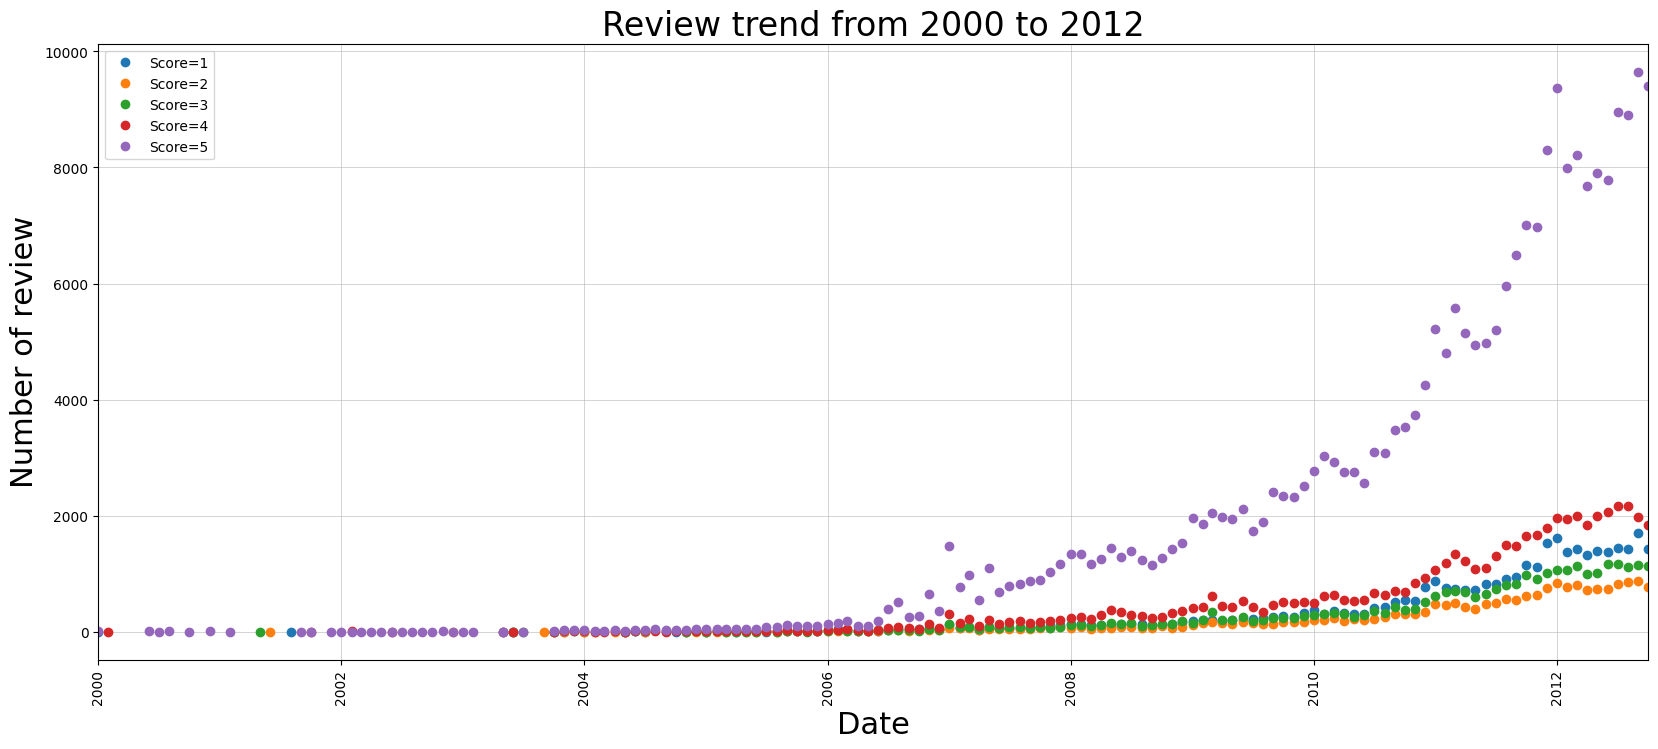

In [272]:
# Assuming 'dff' is your DataFrame

# Convert 'date' to datetime
dff.date = dff.date.dt.strftime('%Y-%m')
dff['date'] = pd.to_datetime(dff['date'] )
display(dff)

# Filter and count by score
scores = [1, 2, 3, 4, 5]
plt.figure(figsize=(20, 8))
for score in scores:
    dff_score = dff[dff['Score'] == score].groupby('date').size().reset_index(name='Count')
    plt.plot_date(x=dff_score['date'], y=dff_score['Count'], label=f'Score={score}')

# Customize the plot
plt.grid(linewidth=0.5, alpha=0.75)
plt.xticks(rotation=90)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2012-10-01'))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of review', fontsize=22)
plt.title('Review trend from 2000 to 2012', fontsize=24)

# Save the plot
plt.savefig('../reports/images/review_trend_month.png')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#### Visualisation of the distribution of ratings (score column)

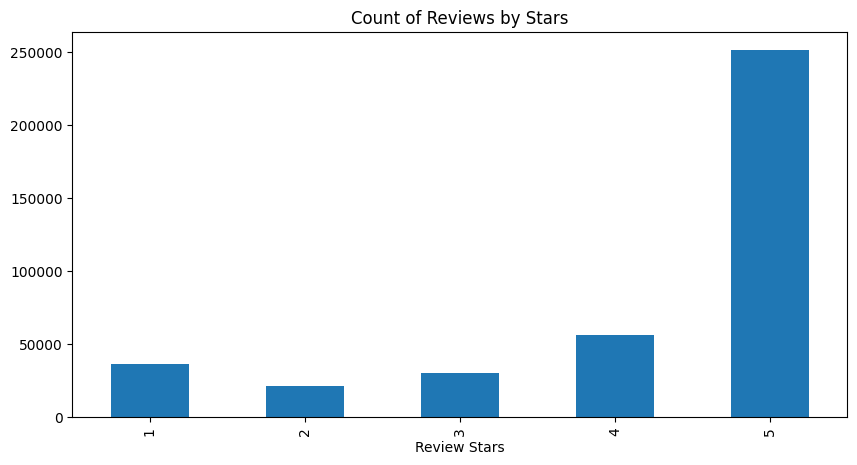

In [127]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')

# Save the plot
plt.savefig('../reports/images/review_score.png')

plt.show()

The dataset is unbalanced

### 3. Exploratory Data Text

#### Text Preprocessing 

https://www.kaggle.com/code/prasheel1047/review-positive-or-negative?scriptVersionId=78532145&cellId=16
https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis?scriptVersionId=115541011&cellId=5

##### Remove Special characters

##### Tokenization

##### Remove Stop-words

##### Text normalization
- Convert Lower or Upper case
- Remove punctuation

##### Steamming or Lemmatization

### 3. Sentiment Analysis

https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis

#### Analysis of the most frequent words in the reviews

#### Visualise the most frequent words in positive and negative reviews.

#### Analysis of the length of the reviews.

#### Display the relationship between review length and score.

### 4. Deep Learning with TensorFlow/Keras

https://www.kaggle.com/code/raman007/amazon-finefood-sentiment-classification-using-knn

#### Matrix confusion to see the correlation

#### Grid Search --> try all methods ML

#### See all metrics

### 5. Parameter Tuning

#### Grid Search

### 6. Integration with Azure ML

### 7. Model Evaluation and Interpretation

### 8. Visualization with Python's Data Visualization Libraries